# Cyclic Learning Rate

In [1]:
import os.path
if  not os.path.isfile("OPT_helper.py"):
    !wget https://github.com/deeplearning-itba/optimizadores/raw/master/OPT_helper.py

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import YouTubeVideo
from sklearn.model_selection import train_test_split
import os.path
import keras
import numpy as np
from matplotlib import pyplot as plt
import OPT_helper
from OPT_helper import make_animation
from sklearn.model_selection import train_test_split
np.random.seed(432)
X=np.vstack([np.random.multivariate_normal([-2.5,-2], [[2,5],[5,1]], 2000),
             np.random.multivariate_normal([2.5,4], [[2,-3],[-3,2]], 2000)])
y=np.hstack([np.ones(2000),
             np.zeros(2000)])
#X=df[['Peso','Altura']].values
#y=df['Genero'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Using TensorFlow backend.
/home/cselmo/miniconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  del sys.path[0]
/home/cselmo/miniconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


<Figure size 640x480 with 1 Axes>

In [2]:
print('Training set data:', x_train.shape)
print('Training labels:', y_train.shape)
print()
print('Testing set data:',x_test.shape)
print('Testing labels:', y_test.shape)

Training set data: (2680, 2)
Training labels: (2680,)

Testing set data: (1320, 2)
Testing labels: (1320,)


# Red Neuronal de 1 capa

In [4]:
# Esta función recibe un modelo y devuelve los pesos que se quieren loggear
def get_weights(model):
    weights=list()
    for layer in model.layers[0:]:
        weights.append([layer.get_weights()[1][0],layer.get_weights()[0][0][0],layer.get_weights()[0][1][0]])
    return weights
def set_weights(model,w0,w1,w2):
    weights=model.layers[0].get_weights()
    weights[0][0][0]=w1
    weights[0][1][0]=w2
    weights[1][0]=w0
    model.layers[0].set_weights(weights)
def reset_weights(model):
    weights=model.layers[-1].get_weights()
    weights[0][0]=weights[0][0]*0
    model.layers[-1].set_weights(weights)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from keras_contrib.callbacks import CyclicLR
model = Sequential()
model.add(Dense(1, input_shape=x_train.shape[1:],activation='sigmoid', kernel_initializer='zeros', bias_initializer='zeros', name='salida'))

optimizer = optimizers.SGD(lr=0.5, decay=0,nesterov=0)
CLR=CyclicLR(base_lr=0.1,
            max_lr=10,
            step_size=50.,
            mode='triangular',
            gamma=1.,
            scale_fn=None,
            scale_mode='cycle')
logWeights=OPT_helper.log_weights(get_weights,
                                  set_weights,
                                  surface_filename="./surface.pck",
                                  w1_range=[-2.4,0.3],
                                  w2_range=[-2.4,0.3],
                                  w0_range=[-1,12],
                                  n_points=20,
                                  w1_opt=-1.8372542,
                                  w2_opt=-2.325091,
                                  w0_opt=6.3067813,
                                  plotloss_data=(x_train, y_train))
model.compile(loss = 'binary_crossentropy', optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
salida (Dense)               (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.


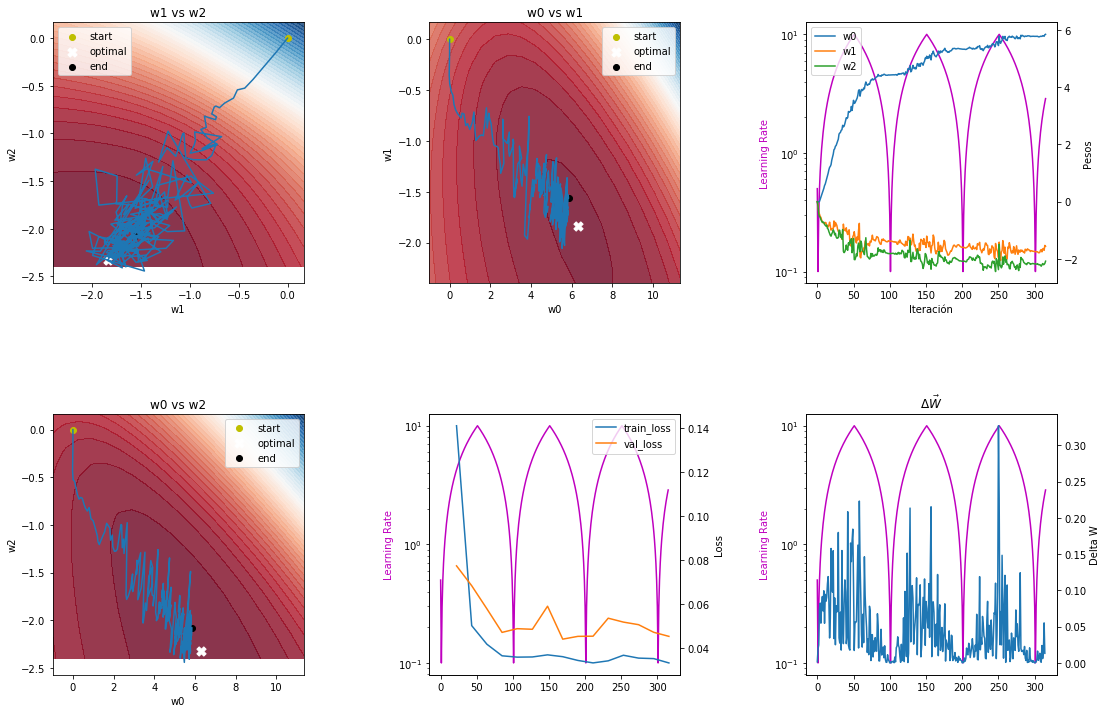

In [6]:
history=model.fit(x_train, 
          y_train ,
          epochs=15,
          batch_size=128, 
          verbose=0, 
          validation_data=(x_test, y_test), 
          callbacks=[logWeights,CLR]
         )

No handles with labels found to put in legend.
No handles with labels found to put in legend.


299

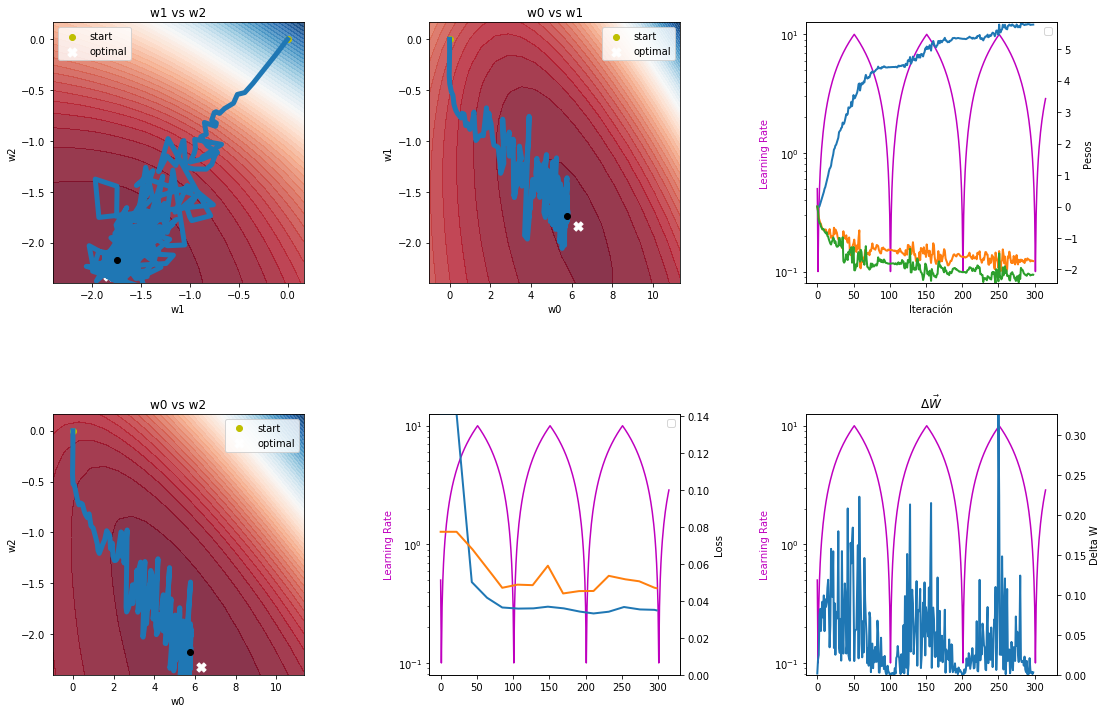

In [7]:
make_animation(output_filename="Adam_CLR.mp4",surface_filename="surface.pck",logWeights=logWeights,max_frames=300)

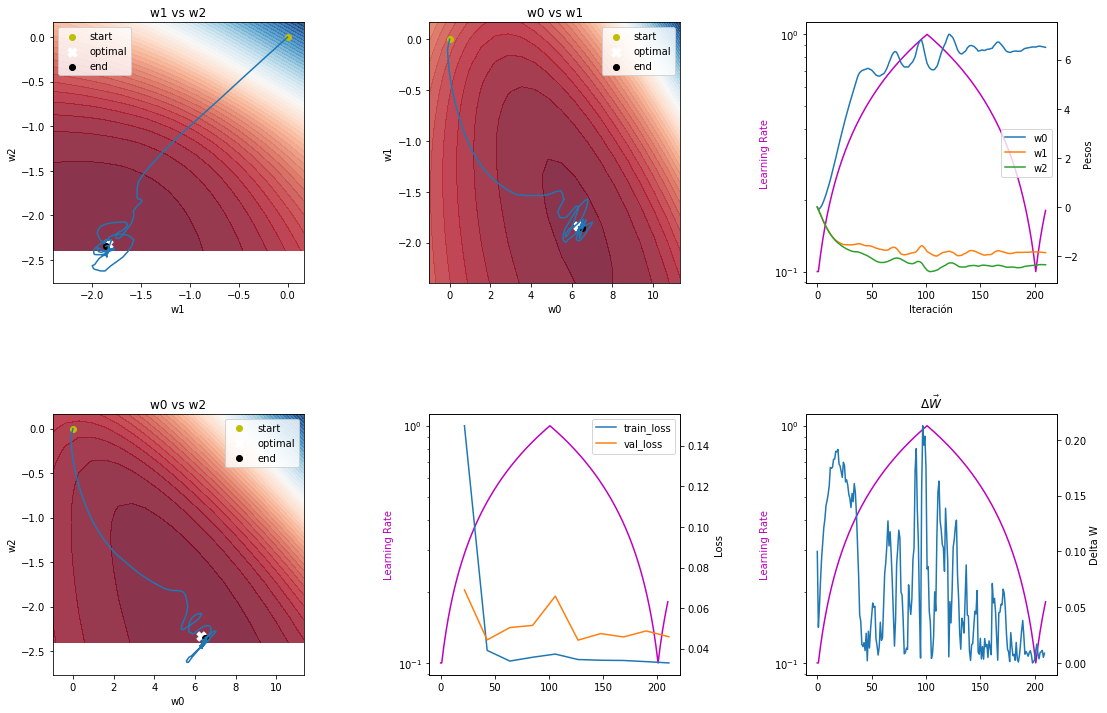

In [10]:
model = Sequential()
model.add(Dense(1, input_shape=x_train.shape[1:],activation='sigmoid', kernel_initializer='normal', name='salida'))

optimizer = optimizers.Adam(lr=0.1)
CLR=CyclicLR(base_lr=0.1,
            max_lr=1,
            step_size=100.,
            mode='triangular',
            gamma=1.,
            scale_fn=None,
            scale_mode='cycle')
logWeights=OPT_helper.log_weights(get_weights,
                                  set_weights,
                                  surface_filename="./surface.pck",
                                  w1_range=[-2.4,0.3],
                                  w2_range=[-2.4,0.3],
                                  w0_range=[-1,12],
                                  n_points=20,
                                  w1_opt=-1.8372542,
                                  w2_opt=-2.325091,
                                  w0_opt=6.3067813,
                                  plotloss_data=(x_train, y_train))
model.compile(loss = 'binary_crossentropy', optimizer=optimizer)
history=model.fit(x_train, 
          y_train ,
          epochs=10,
          batch_size=128, 
          verbose=0, 
          validation_data=(x_test, y_test), 
          callbacks=[logWeights,CLR]
         )

No handles with labels found to put in legend.
No handles with labels found to put in legend.


199

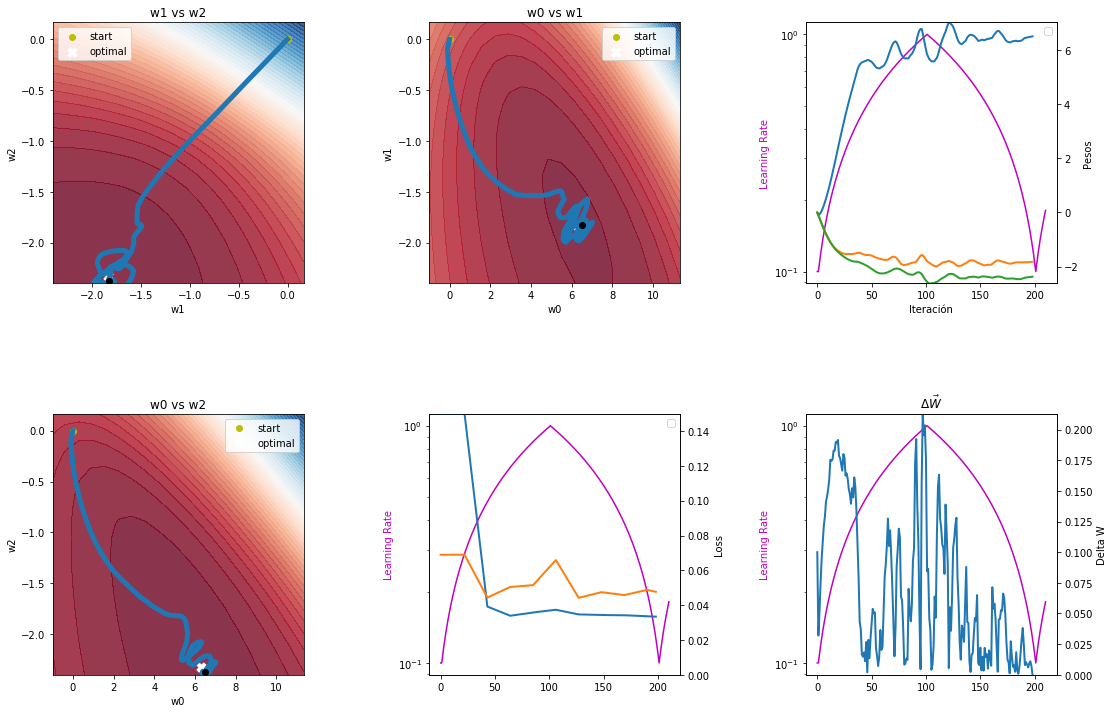

In [11]:
make_animation(output_filename="Adam-CLR-2.mp4",surface_filename="surface.pck",logWeights=logWeights,max_frames=200)